In [1]:
import numpy as np
from matplotlib import pyplot as plt


def show_image(img):
    plt.axis('off')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0, wspace=0)
    plt.margins(0, 0)
    plt.imshow(img)
    plt.show()


def yuv2rgb(yuv):
    yuv = yuv.astype('float64')
    yuv[..., 1] -= 128.0
    yuv[..., 2] -= 128.0
    m = np.array([[1, 1, 1],
                  [0, -0.337633, 1.732466],
                  [1.370705, -0.698001, 0]])
    rgb = yuv@m
    rgb = np.clip(rgb, 0.0, 255.0)
    return rgb.astype('uint8')


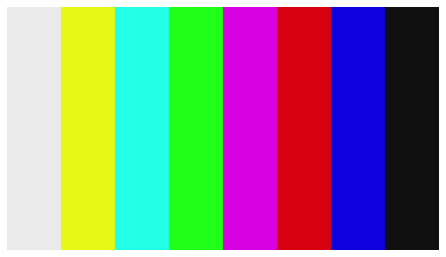

In [2]:
# yuyv YUV422P(Packed)
img = np.fromfile('yuv_images/1280x720.yuyv', dtype='uint8').reshape(720, 1280, 2)
Y = img[..., 0]
U = img[::, ::2, 1]
V = img[::, 1::2, 1]
U = U.repeat(2, axis=1)
V = V.repeat(2, axis=1)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)


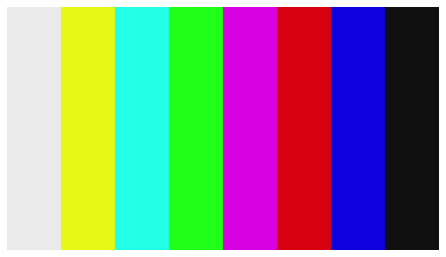

In [3]:
# yvyu
img = np.fromfile('yuv_images/1280x720.yvyu', dtype='uint8').reshape(720, 1280, 2)
Y = img[..., 0]
U = img[::, 1::2, 1]
V = img[::, 0::2, 1]
U = U.repeat(2, axis=1)
V = V.repeat(2, axis=1)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)


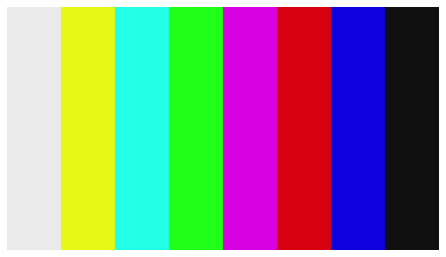

In [4]:
# uyvy
img = np.fromfile('yuv_images/1280x720.uyvy', dtype='uint8').reshape(720, 1280, 2)
Y = img[..., 1]
U = img[::, ::2, 0]
V = img[::, 1::2, 0]
U = U.repeat(2, axis=1)
V = V.repeat(2, axis=1)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)


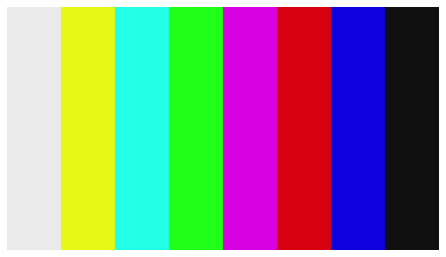

In [5]:
# vyuy
img = np.fromfile('yuv_images/1280x720.vyuy', dtype='uint8').reshape(720, 1280, 2)
Y = img[..., 1]
U = img[::, 1::2, 0]
V = img[::, ::2, 0]
U = U.repeat(2, axis=1)
V = V.repeat(2, axis=1)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)


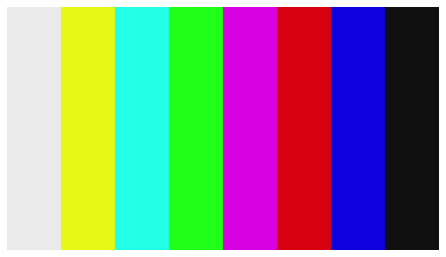

In [6]:
# YUV422P(planar) U前V后:YUV422P又叫I422或YU16
w, h = 1280, 720
img = np.fromfile('yuv_images/1280x720.422P', dtype='uint8')
Y, U, V = np.split(img, [w*h, w*h*3//2])
Y.shape = h, w
U.shape = h, w//2
V.shape = h, w//2
U = U.repeat(2, axis=1)
V = V.repeat(2, axis=1)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)


![](YU12.png)

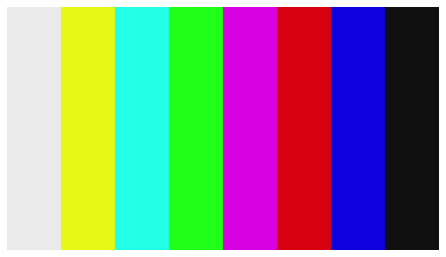

In [7]:
# YUV420P(planar),   根据U、V的顺序，又有2种，U前V后即YUV420P又叫I420或YU12
w, h = 1280, 720
img = np.fromfile('yuv_images/1280x720.YU12', dtype='uint8')
Y, U, V = np.split(img, [w*h, w*h*5//4])
Y.shape = h, w
U.shape = h//2, w//2
V.shape = h//2, w//2
U = U.repeat(2, axis=1).repeat(2, axis=0)
V = V.repeat(2, axis=1).repeat(2, axis=0)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)


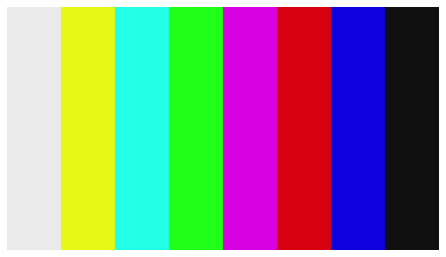

In [8]:
# YUV420P(planar), 根据U、V的顺序，又有2种 V前U后，叫YV12
w, h = 1280, 720
img = np.fromfile('yuv_images/1280x720.YV12', dtype='uint8')
Y, V, U = np.split(img, [w*h, w*h*5//4])
Y.shape = h, w
U.shape = h//2, w//2
V.shape = h//2, w//2
U = U.repeat(2, axis=1).repeat(2, axis=0)
V = V.repeat(2, axis=1).repeat(2, axis=0)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)


![](NV12.png)

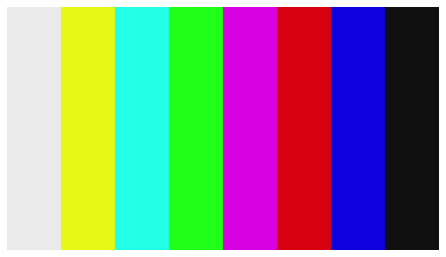

In [9]:
# YUV420SP（planar）根据U、V的顺序，又有2种，U前V后叫NV12，在国内好像很多人叫它为YUV420SP格式；V前U后叫NV21。
w, h = 1280, 720
img = np.fromfile('yuv_images/1280x720.NV12', dtype='uint8')
Y, UV = np.split(img, [w*h])
U = UV[::2]
V = UV[1::2]
Y.shape = h, w
U.shape = h//2, w//2
V.shape = h//2, w//2
U = U.repeat(2, axis=1).repeat(2, axis=0)
V = V.repeat(2, axis=1).repeat(2, axis=0)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)


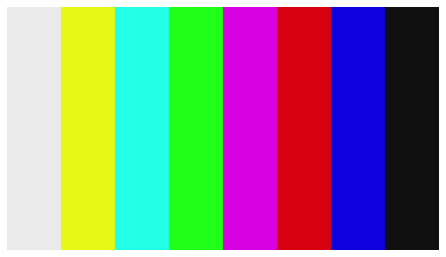

In [10]:
# YUV420SP（planar）根据U、V的顺序，又有2种，U前V后叫NV12，在国内好像很多人叫它为YUV420SP格式；V前U后叫NV21。
w, h = 1280, 720
img = np.fromfile('yuv_images/1280x720.NV21', dtype='uint8')
Y, UV = np.split(img, [w*h])
V = UV[::2]
U = UV[1::2]
Y.shape = h, w
U.shape = h//2, w//2
V.shape = h//2, w//2
U = U.repeat(2, axis=1).repeat(2, axis=0)
V = V.repeat(2, axis=1).repeat(2, axis=0)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)

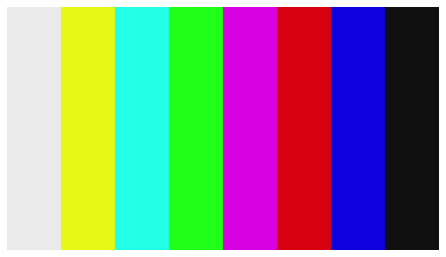

In [11]:
# YUV422SP（planar）根据U、V的顺序，又有2种，U前V后叫NV16，在国内好像很多人叫它为YUV422SP格式；V前U后叫NV61。
w, h = 1280, 720
img = np.fromfile('yuv_images/1280x720.NV16', dtype='uint8')
Y, UV = np.split(img, [w*h])
U = UV[::2]
V = UV[1::2]
Y.shape = h, w
U.shape = h, w//2
V.shape = h, w//2
U = U.repeat(2, axis=1)
V = V.repeat(2, axis=1)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)


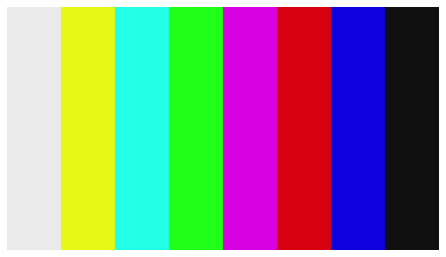

In [12]:
# YUV422SP（planar）根据U、V的顺序，又有2种，U前V后叫NV16，在国内好像很多人叫它为YUV422SP格式；V前U后叫NV61。
w, h = 1280, 720
img = np.fromfile('yuv_images/1280x720.NV61', dtype='uint8')
Y, UV = np.split(img, [w*h])
V = UV[::2]
U = UV[1::2]
Y.shape = h, w
U.shape = h, w//2
V.shape = h, w//2
U = U.repeat(2, axis=1)
V = V.repeat(2, axis=1)
yuv = np.dstack((Y, U, V))
rgb = yuv2rgb(yuv)
show_image(rgb)
